# AOI information retrieval and plotting 

In [1]:
import geopandas as gpd 
import contextily as cx


In [2]:
aoi = gpd.read_file('/home/gentleprotector/plus_ss24/data_for_analysis/new/new_aoi.gpkg')
aoi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
aoi_bs = aoi.bounds.iloc[0]
aoi_bs = (aoi_bs['minx'], aoi_bs['maxx'], aoi_bs['miny'], aoi_bs['maxy']) 
aoi_bs

(-8.031639723798538, -8.00479972870905, 31.112777337451792, 31.13617915135213)

In [4]:
gdf = aoi['geometry'].to_crs(26191) 
gdf.area / 10**6

0    6.646733
dtype: float64

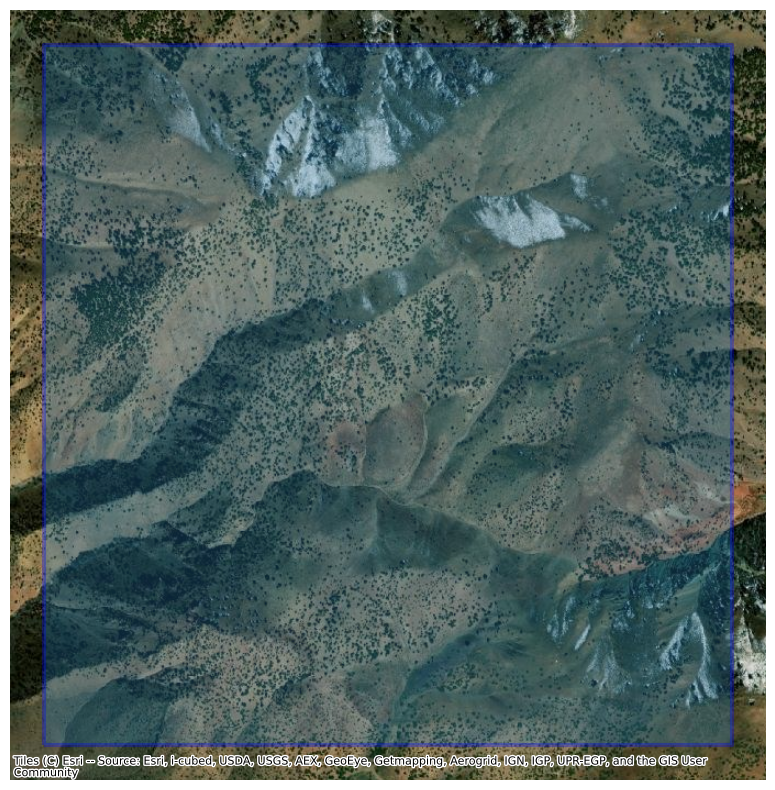

In [5]:
aoi_wm = aoi.to_crs(epsg=3857)

ax = aoi_wm.plot(figsize=(10, 10), edgecolor="b", linewidth=3, alpha=0.3)
cx.add_basemap(ax, zoom=15, source=cx.providers.Esri.WorldImagery)
ax.set_axis_off()
#ax.figure.savefig('aoi_worldimg.png' ,dpi=300)

In [ ]:
ax = aoi_wm.plot(figsize=(10, 10), edgecolor="b", linewidth=3, alpha=0.3)
cx.add_basemap(ax, zoom=19)

In [ ]:
import xdem 
import matplotlib.pyplot as plt 
import numpy as np
import numpy.ma as ma 
import re 
import pandas as pd 
import geopandas as gpd
import scipy 
import statsmodels.api as sm 
import geoutils as gu
import rasterio as rio
import skimage
import seaborn as sns

from scipy.ndimage import gaussian_filter

In [ ]:
ref = gu.Raster("/home/gentleprotector/plus_ss24/data_for_analysis/new/ref_clip_new.tif")
ref.load()
ref.set_mask(ref.data == 0)
dem_ref = xdem.DEM(ref)
dem_ref.set_vcrs('Ellipsoid') 
dem_ref = dem_ref.reproject(crs=26191)

In [ ]:
dem_ref.info()

In [ ]:
attributes = xdem.terrain.get_terrain_attribute(
    dem_ref.data,
    resolution=dem_ref.res,
    attribute=["hillshade", "slope", "aspect"],
)

In [ ]:
aspect = xdem.terrain.aspect(dem_ref)

def plot_attribute(attribute, cmap, label=None, vlim=None):

    add_cbar = True if label is not None else False

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)

    if vlim is not None:
        if isinstance(vlim, (int, float)):
            vlims = {"vmin": -vlim, "vmax": vlim}
        elif len(vlim) == 2:
            vlims = {"vmin": vlim[0], "vmax": vlim[1]}
    else:
        vlims = {}

    attribute.plot(ax=ax, cmap=cmap, add_cbar=add_cbar, cbar_title=label, **vlims)

    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

plot_ascp = plot_attribute(aspect, "twilight", "Aspect (°)")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
aspect.plot(cmap="twilight", cbar_title="Aspect (°)", ax=ax) 
ax.set_axis_off()
#ax.figure.savefig('aoi_aspect.png' ,dpi=300)